Average MSE across 5 folds: 0.5306


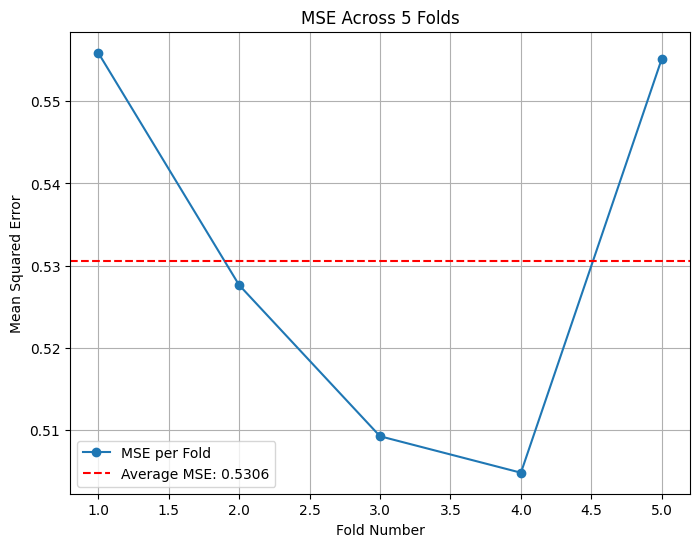

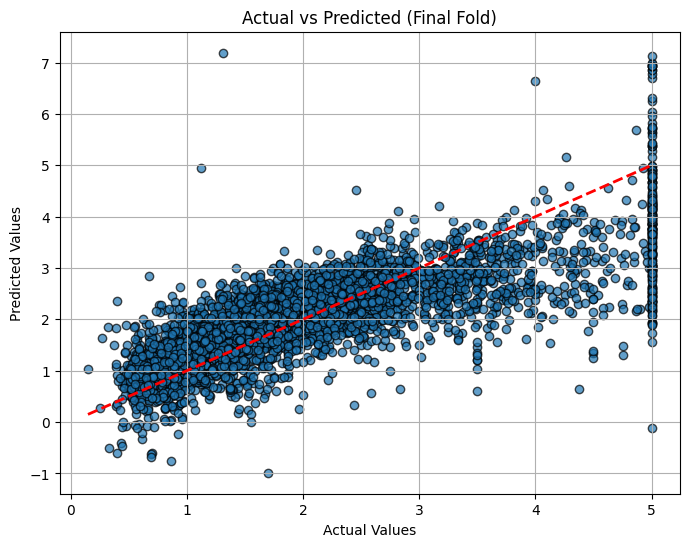

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load California Housing Dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Define the model
model = LinearRegression()

# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
final_fold = None

for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate and store the MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Save the final fold's data for visualization
    if fold == 5:
        final_fold = (y_test, y_pred)

# Report Average MSE
average_mse = np.mean(mse_scores)
print(f"Average MSE across 5 folds: {average_mse:.4f}")

# Visualize MSE across folds
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), mse_scores, marker='o', label="MSE per Fold")
plt.axhline(average_mse, color='r', linestyle='--', label=f"Average MSE: {average_mse:.4f}")
plt.xlabel("Fold Number")
plt.ylabel("Mean Squared Error")
plt.title("MSE Across 5 Folds")
plt.legend()
plt.grid(True)
plt.show()

# Actuals vs Predicted for Final Fold
y_test_final, y_pred_final = final_fold
plt.figure(figsize=(8, 6))
plt.scatter(y_test_final, y_pred_final, alpha=0.7, edgecolor='k')
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'r--', lw=2)  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Final Fold)")
plt.grid(True)
plt.show()
